In [1]:
# LOAD REQUIRED LIBRARIES
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# LOAD DATASET
dataset = pd.read_csv("./BodyFatMale.csv")

In [3]:
# PRINT HEAD OF DATASET
print(dataset.head())

   BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3   23   69.97    1.72  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1   22   78.59    1.84  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3   22   69.85    1.68  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4   26   83.80    1.84  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7   24   83.58    1.81  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [5]:
corr_matrix = dataset.corr()

# Find the columns with low correlation to the target variable
low_corr_cols = list(corr_matrix[corr_matrix['BodyFat'] < 0.3].index)

# Print the correlation matrix
print(low_corr_cols)

['Age', 'Height', 'Ankle']


<Axes: >

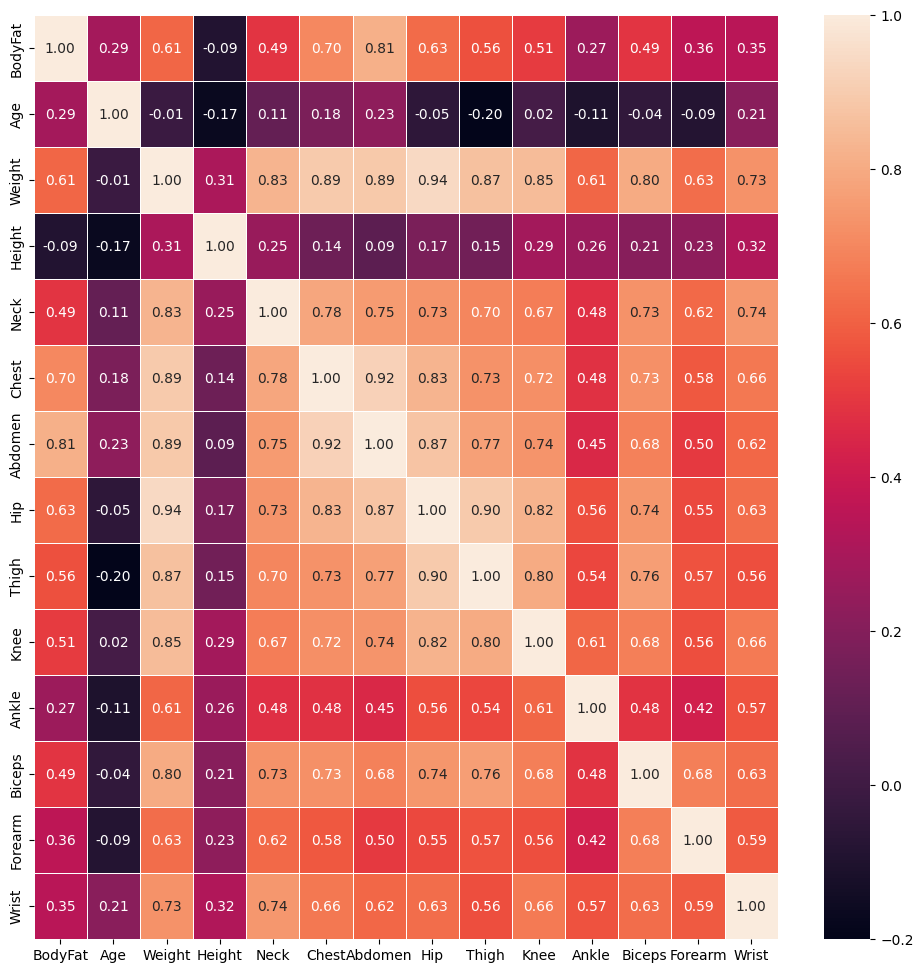

In [6]:
plt.figure(figsize=(12,12))
sns.heatmap(dataset.corr(),annot=True,linewidth=0.5,fmt="0.2f")

In [7]:
# SPLITING THE DATASET INTO TRAINING AND TESTING DATA
X = dataset.drop('BodyFat', axis=1)
y = dataset['BodyFat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
import joblib

# SCALLING THE DATA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler object
joblib.dump(scaler, 'scaler_model_male.pkl')

# Load the scaler object
scaler = joblib.load('scaler_model_male.pkl')

In [26]:
import pickle

# Generate the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the models
model.fit(X_train, y_train, epochs=1500, batch_size=15)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print('Test mean absolute error:', mae)

# Save the model
model.save('fatprediction_model_male.h5')

# Save the model in pickle format
with open('fatprediction_model_male.pkl', 'wb') as f:
    pickle.dump(model, f)

Epoch 1/1500
14/14 [==============================] - 1s 2ms/step - loss: 444.7867 - mae: 19.2035
Epoch 2/1500
14/14 [==============================] - 0s 2ms/step - loss: 414.5504 - mae: 18.5038
Epoch 3/1500
14/14 [==============================] - 0s 2ms/step - loss: 373.1886 - mae: 17.4201
Epoch 4/1500
14/14 [==============================] - 0s 2ms/step - loss: 303.3246 - mae: 15.4350
Epoch 5/1500
14/14 [==============================] - 0s 2ms/step - loss: 205.8122 - mae: 12.2678
Epoch 6/1500
14/14 [==============================] - 0s 5ms/step - loss: 126.8888 - mae: 9.3628
Epoch 7/1500
14/14 [==============================] - 0s 6ms/step - loss: 114.4585 - mae: 8.7950
Epoch 8/1500
14/14 [==============================] - 0s 2ms/step - loss: 97.2643 - mae: 8.1611
Epoch 9/1500
14/14 [==============================] - 0s 2ms/step - loss: 84.1203 - mae: 7.5914
Epoch 10/1500
14/14 [==============================] - 0s 3ms/step - loss: 74.2967 - mae: 7.1191
Epoch 11/1500
14/14 [======

In [31]:
# Load the saved model
loaded_model = tf.keras.models.load_model('fatprediction_model_male.h5')

# Define a new set of input features
new_data = [[23,69.97,1.72,36.2,93.1,85.2,94.5,59,37.3,21.9,32,27.4,17.1]]

# Scale the input features using the same StandardScaler object used during training
new_data_scaled = scaler.transform(new_data)

# Use the trained model to predict the body fat percentage for the new input features
prediction = loaded_model.predict(new_data_scaled)

print('Predicted body fat percentage:', round(prediction[0][0]))

1/1 [==============================] - 0s 65ms/step
Predicted body fat percentage: 724
